Μπεκιάρης Χαράλαμπος

Σχολή ΕΜΦΕ, 6ο εξάμηνο

Α.Μ.: ge18088

# Άσκηση 1

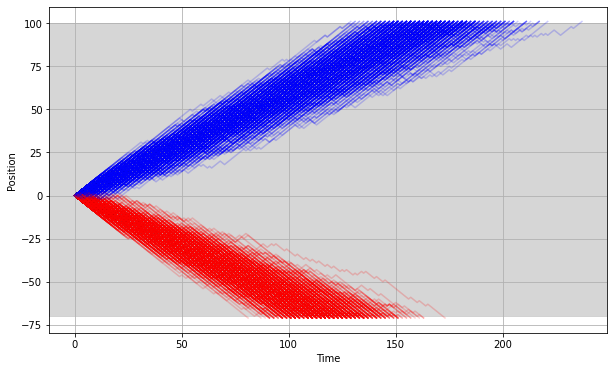

In [30]:
import numpy as np
from numpy.random import choice

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)  # default figure size

##########################################
np.random.seed(2017)  # same results are previous run

# random walk generator:
def rand_walk_Z(start = 0, probs = (0.5, 0.5)):
    x = start
    steps = [-1, 1]  # probs order should be (left, right)
    while True:  # continue for ever in needed
        x += choice(steps, p=probs)
        yield x  # it's a generator!
###############################################  

fig, ax = plt.subplots()  # initiate plots

a = -70  # lower boundary
b = 100  # upper boundary

colors = ['red','blue']
probs = [(4/5,1/5),(1/5,4/5)]
escape_time = [np.zeros(500, dtype=int),
               np.zeros(500, dtype=int)] # to store the exit time

for j in range(500):
    for i in range(2):  # 2 random walks r-ed, g-reen
        walker = rand_walk_Z(0,probs[i])  # start new symmetric walk from 0
        x = 0  # start position 0
        t = 0 # Steps untill escape
        chain = [x]  # save positions to plot
        while a <= x <= b:
            x = next(walker)
            chain.append(x)
            t += 1
        ax.plot(chain, color=colors[i], alpha = 0.2)
        escape_time[i][j] = t
        

# To look nicer
plt.axhspan(a, b, color = '#cccccc', alpha = 0.8)  # box between a & b
ax.grid()  # adds grid lines
plt.xlabel('Time')
plt.ylabel('Position')

# Show image!
plt.show()

Το διάστημα $[-70,100]$ δεν είναι συμμετρικό ως προς το $0$, επομένως όπως ήταν αναμενόμενο η αλυσίδα που έχει τάση προς τα αριστερά τερματίζει νωρίτερα. Υπάρχουν κάποιες περιπτώσεις που η αλυσίδα με τάση προς τρα δεξιά τερματίζει νωρίτερα, όμως είναι λίγες καθώς δεν φαίνεται να υπάρχει επικάλυψη με άλλες διαδρομές της ίδιας αλυσίδας.  

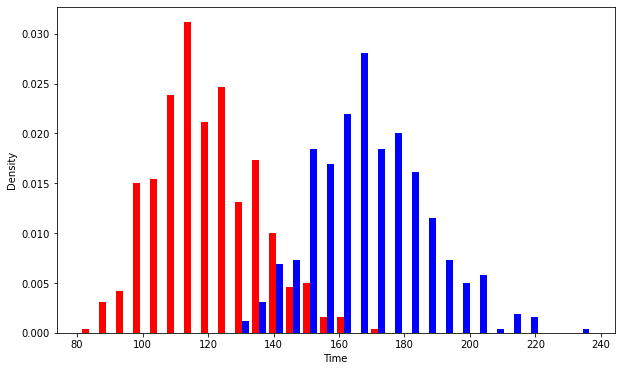

In [42]:
plt.hist([escape_time[0], escape_time[1]], bins=30, density=True, color=['red','blue'])
plt.xlabel('Time')
plt.ylabel('Density')
plt.show()

# Άσκηση 2

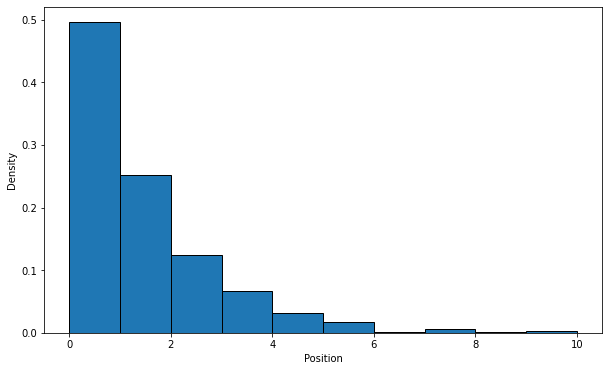

In [2]:
import numpy as np
from numpy.random import choice

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)  # default figure size

##########################################
np.random.seed(2017)  # same results are previous run

# random walk generator:
def rand_walk_Z(start = 0, probs = (2/3, 0, 1/3)):
    x = start
    steps = [-1, 0, 1]  # probs order should be (left, stay, right)
    while True:  # continue for ever in needed
        if x==0:
            x += choice(steps, p=(0,2/3,1/3))
        else:
            x += choice(steps, p=probs)
        yield x  # it's a generator!
############################################### 

states = np.zeros(1000, dtype=int)

for i in range(1000):
    walker = rand_walk_Z()  # start new symmetric walk from 0
    x = 0  # start position 0
    for j in range(100):
        x = next(walker)
    states[i] = x
        
plt.hist(states,bins=10, edgecolor='black',density=True)
plt.xlabel('Position')
plt.ylabel('Density')
plt.show()

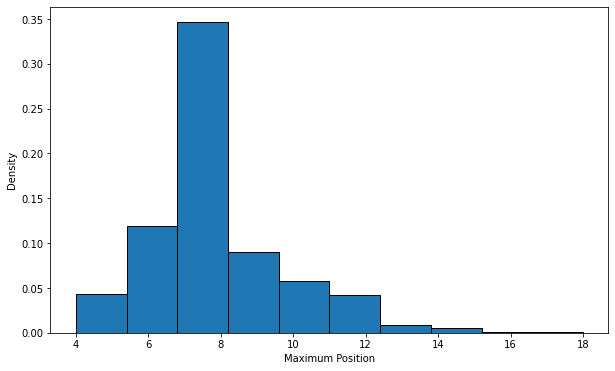

The sample mean is: 7
The sample variance is: 3


In [4]:
np.random.seed(2017)  # same results are previous run


states = np.zeros(1000, dtype=int)

for i in range(1000):
    walker = rand_walk_Z()  # start new symmetric walk from 0
    x = 0  # start position 0
    maximum = x
    for j in range(1000):
        x = next(walker)
        if x>maximum:
            maximum = x
    states[i] = maximum
        
plt.hist(states, edgecolor='black',density=True)
plt.xlabel('Maximum Position')
plt.ylabel('Density')
plt.show()

import statistics as stat
print("The sample mean is: {}\nThe sample variance is: {}".format(stat.mean(states),stat.variance(states)))

# Άσκηση 3

<Figure size 720x432 with 0 Axes>

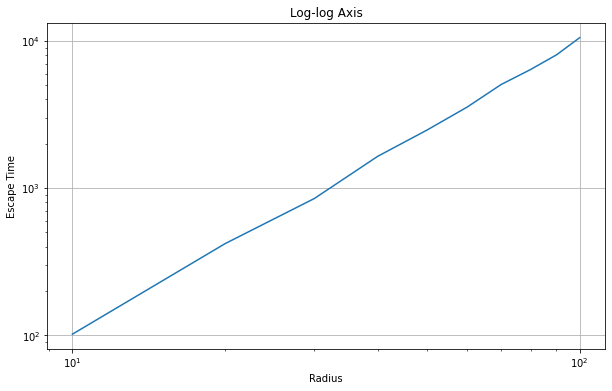

<Figure size 720x432 with 0 Axes>

In [5]:
import numpy as np
from numpy.random import choice
import statistics as stat
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)  # default figure size

##########################################
np.random.seed(2017)  # same results are previous run
y = [np.zeros(500, dtype=int),]*10 

# random walk in Z^2 generator:
def rand_walk_Z2(start=(0, 0), probs=(0.25, 0.25, 0.25, 0.25)):
    # probs order (left, right, bottom, up)
    x, y = start
    steps = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    while True:
        dx, dy = steps[choice(4, p=probs)]  # choice(4) = choose a number in [0,3]
        x, y = x + dx, y + dy
        yield x, y
############################################### 

radius = [10*x for x in range(1,11)] # Radius 10,20,...,100
escape_time = [np.zeros(500, dtype=int),]*10
time = []

for j in range(10):  # 10 random walks
    r = radius[j]
    r2 = r**2
    for i in range(500):
        x, y = 0, 0  # start position 0
        walker = rand_walk_Z2()  # start new symmetric walk from 0, 0
        t = 0 
        while x**2 + y**2 < r2:
            x, y = next(walker)
            t += 1
        escape_time[j][i]  = t
    time.append(int(stat.mean(escape_time[j])))

          

    
plt.loglog(radius, time, base=10)
plt.xlabel('Radius')
plt.ylabel('Escape Time')
plt.title('Log-log Axis')
plt.grid(True)
plt.figure()

Βλέπουμε στο παραπάνω διάγραμμα μία ευθεία, επομένως καθώς αυξάνει η ακτίνα, ο χρόνος διαφυγής αυξάνεται εκθετικά.